In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
df['Profession'].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

In [8]:
df = df.dropna()

In [9]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [10]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


# Clustering
Data Preparation UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.

In [11]:
df_dummies = pd.get_dummies(df)

In [12]:
df_dummies

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0
1,2,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0
2,3,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0
3,4,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0
4,5,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7,1,0,1,0,0,0,0,0,0,0,0
1996,1997,91,73158,32,7,7,1,0,0,1,0,0,0,0,0,0,0
1997,1998,87,90961,14,9,2,0,1,0,0,0,0,0,1,0,0,0
1998,1999,77,182109,4,7,2,0,1,0,0,0,0,1,0,0,0,0


In [13]:
df_dummies.drop('Gender_Male', axis = 1)

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,0,0,0,0,0,0,1,0,0,0
1,2,21,35000,81,3,3,0,0,0,1,0,0,0,0,0,0
2,3,20,86000,6,1,1,1,0,0,1,0,0,0,0,0,0
3,4,23,59000,77,0,2,1,0,0,0,0,0,0,0,1,0
4,5,31,38000,40,2,6,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7,1,1,0,0,0,0,0,0,0,0
1996,1997,91,73158,32,7,7,1,0,1,0,0,0,0,0,0,0
1997,1998,87,90961,14,9,2,0,0,0,0,0,0,1,0,0,0
1998,1999,77,182109,4,7,2,0,0,0,0,0,1,0,0,0,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaled_X = scaler.fit_transform(df_dummies)

In [17]:
scaled_X

array([[-1.72802344e+00, -1.05234500e+00, -2.08667453e+00, ...,
        -1.77471302e-01, -2.79094217e-01, -2.12632937e-01],
       [-1.72629423e+00, -9.81941450e-01, -1.65020484e+00, ...,
        -1.77471302e-01, -2.79094217e-01, -2.12632937e-01],
       [-1.72456501e+00, -1.01714323e+00, -5.37207112e-01, ...,
        -1.77471302e-01, -2.79094217e-01, -2.12632937e-01],
       ...,
       [ 1.72522238e+00,  1.34137577e+00, -4.28940804e-01, ...,
        -1.77471302e-01, -2.79094217e-01, -2.12632937e-01],
       [ 1.72695159e+00,  9.89358008e-01,  1.56022619e+00, ...,
        -1.77471302e-01, -2.79094217e-01, -2.12632937e-01],
       [ 1.72868081e+00,  1.44698110e+00, -1.31151925e-04, ...,
        -1.77471302e-01, -2.79094217e-01, -2.12632937e-01]])

In [18]:
scaled_df = pd.DataFrame(scaled_X, columns=df_dummies.columns).drop('CustomerID', axis = 1)

In [19]:
scaled_df

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,-1.052345,-2.086675,-0.431850,-0.787837,0.123358,-1.208025,1.208025,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,2.190082,-0.177471,-0.279094,-0.212633
1,-0.981941,-1.650205,1.069755,-0.278342,-0.384815,-1.208025,1.208025,-0.672553,-0.298741,3.158742,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
2,-1.017143,-0.537207,-1.611684,-0.787837,-1.401161,0.827798,-0.827798,-0.672553,-0.298741,3.158742,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
3,-0.911538,-1.126441,0.926745,-1.042584,-0.892988,0.827798,-0.827798,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,3.583019,-0.212633
4,-0.629924,-1.584734,-0.396098,-0.533089,1.139704,0.827798,-0.827798,-0.672553,-0.298741,-0.316582,2.719823,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,0.778147,1.609940,-0.396098,0.995394,1.647877,0.827798,-0.827798,1.486871,-0.298741,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
1961,1.482183,-0.817464,-0.682118,0.740647,1.647877,0.827798,-0.827798,-0.672553,3.347382,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
1962,1.341376,-0.428941,-1.325663,1.250141,-0.892988,-1.208025,1.208025,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,2.190082,-0.177471,-0.279094,-0.212633
1963,0.989358,1.560226,-1.683189,0.740647,-0.892988,-1.208025,1.208025,-0.672553,-0.298741,-0.316582,-0.367671,3.441386,-0.456604,-0.177471,-0.279094,-0.212633


In [20]:
scaled_df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
count,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03
mean,-1.606857e-16,3.254389e-16,1.058667e-16,2.555490e-16,3.081844e-15,-2.644195e-17,2.644195e-17,-1.562787e-16,-7.181137e-17,-8.982919e-16,-5.591230e-16,1.309668e-16,3.667973e-16,-1.752909e-16,9.876182e-17,2.648998e-16
std,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00
min,-1.721179e+00,-2.414027e+00,-1.826199e+00,-1.042584e+00,-1.401161e+00,-1.208025e+00,-8.277975e-01,-6.725535e-01,-2.987409e-01,-3.165817e-01,-3.676710e-01,-2.905806e-01,-4.566039e-01,-1.774713e-01,-2.790942e-01,-2.126329e-01
25%,-8.411343e-01,-7.914507e-01,-8.251281e-01,-7.878366e-01,-8.929878e-01,-1.208025e+00,-8.277975e-01,-6.725535e-01,-2.987409e-01,-3.165817e-01,-3.676710e-01,-2.905806e-01,-4.566039e-01,-1.774713e-01,-2.790942e-01,-2.126329e-01
50%,-3.149350e-02,-1.870294e-02,-3.857269e-02,-2.783422e-01,1.233580e-01,8.277975e-01,-8.277975e-01,-6.725535e-01,-2.987409e-01,-3.165817e-01,-3.676710e-01,-2.905806e-01,-4.566039e-01,-1.774713e-01,-2.790942e-01,-2.126329e-01
75%,8.485509e-01,8.397457e-01,8.552403e-01,7.406468e-01,6.315309e-01,8.277975e-01,1.208025e+00,1.486871e+00,-2.987409e-01,-3.165817e-01,-3.676710e-01,-2.905806e-01,-4.566039e-01,-1.774713e-01,-2.790942e-01,-2.126329e-01
max,1.763797e+00,1.731868e+00,1.749053e+00,3.288119e+00,2.664223e+00,8.277975e-01,1.208025e+00,1.486871e+00,3.347382e+00,3.158742e+00,2.719823e+00,3.441386e+00,2.190082e+00,5.634714e+00,3.583019e+00,4.702940e+00


# Creating and Fitting a KMeans Model
Note of our method choices here:

fit

Compute k-means clustering. fit_predict

Compute cluster centers and predict cluster index for each sample. fit_transform

Compute clustering and transform X to cluster-distance space. predict

Predict the closest cluster each sample in X belongs to.

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters = 2, init = 'k-means++',random_state=42) #default c_clusters = 8

In [23]:
cluster_labels = model.fit_predict(scaled_X)

In [24]:
cluster_labels

array([0, 0, 1, ..., 0, 0, 0])

In [25]:
model.inertia_

29467.15346232405

In [26]:
np.unique(cluster_labels)

array([0, 1])

In [27]:
from sklearn import metrics
metrics.silhouette_score(scaled_X, cluster_labels)

0.12775869699396208

In [28]:
df_dummies['Clusters'] = cluster_labels

In [29]:
df_dummies

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Clusters
0,1,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,0
1,2,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,0
2,3,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,1
3,4,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,1
4,5,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7,1,0,1,0,0,0,0,0,0,0,0,1
1996,1997,91,73158,32,7,7,1,0,0,1,0,0,0,0,0,0,0,1
1997,1998,87,90961,14,9,2,0,1,0,0,0,0,0,1,0,0,0,0
1998,1999,77,182109,4,7,2,0,1,0,0,0,0,1,0,0,0,0,0


(array([182., 192., 207., 239., 193., 197., 205., 163., 197., 190.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

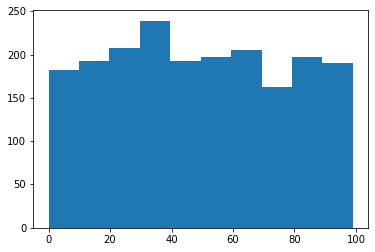

In [30]:
plt.hist(df_dummies.Age)

In [31]:
df_dummies[df_dummies['Gender_Female'] == 0].shape

(799, 18)

In [32]:
df_dummies[df_dummies['Gender_Female'] == 1]['Clusters'].value_counts()

1    1166
Name: Clusters, dtype: int64

(array([ 52.,  49., 126., 286., 291., 233., 231., 248., 218., 231.]),
 array([     0. ,  18997.4,  37994.8,  56992.2,  75989.6,  94987. ,
        113984.4, 132981.8, 151979.2, 170976.6, 189974. ]),
 <BarContainer object of 10 artists>)

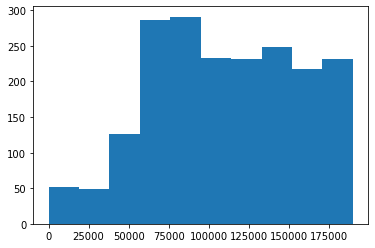

In [33]:
plt.hist(df_dummies['Annual Income ($)'])

(array([890., 114., 233., 119., 284., 240.,  13.,  32.,  30.,  10.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

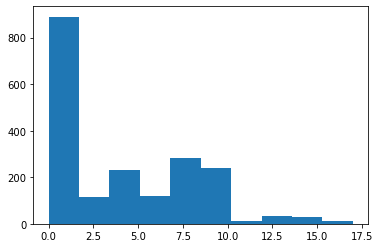

In [34]:
plt.hist(df_dummies['Work Experience'])

In [35]:
df_dummies.shape

(1965, 18)

In [36]:
df_dummies[df_dummies['Gender_Female'] == 0].shape

(799, 18)

In [37]:
df_dummies[df_dummies['Gender_Female'] == 0]['Clusters']

0       0
1       0
8       0
10      0
14      0
       ..
1987    0
1992    0
1997    0
1998    0
1999    0
Name: Clusters, Length: 799, dtype: int32

In [38]:
df_dummies.corr()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Clusters
CustomerID,1.000000,0.074915,0.329822,0.014387,0.092284,0.163545,-0.009059,0.009059,-0.007298,0.005301,-0.035374,0.038692,0.036151,-0.023240,0.006938,-0.020708,0.013936,-0.009059
Age,0.074915,1.000000,0.021064,-0.037387,-0.016771,0.034810,0.000504,-0.000504,0.002610,-0.023909,0.069098,0.029351,-0.023459,-0.016893,-0.022040,-0.011211,-0.022988,0.000504
Annual Income ($),0.329822,0.021064,1.000000,0.026716,0.087135,0.093757,-0.004775,0.004775,-0.026998,0.006241,0.003767,0.000275,0.020002,0.019511,-0.007194,0.002313,-0.012166,-0.004775
Spending Score (1-100),0.014387,-0.037387,0.026716,1.000000,-0.025587,0.005859,-0.003703,0.003703,0.038454,0.008777,-0.023909,0.024467,-0.012227,-0.009185,-0.029793,-0.022149,-0.017950,-0.003703
Work Experience,0.092284,-0.016771,0.087135,-0.025587,1.000000,0.012727,-0.017418,0.017418,0.021085,0.016113,-0.011074,-0.055507,0.011529,-0.010430,0.092261,-0.040132,0.011552,-0.017418
Family Size,0.163545,0.034810,0.093757,0.005859,0.012727,1.000000,0.002129,-0.002129,-0.035427,-0.013123,-0.028354,0.024595,0.031020,0.034423,0.026402,-0.019506,-0.003008,0.002129
Gender_Female,-0.009059,0.000504,-0.004775,-0.003703,-0.017418,0.002129,1.000000,-1.000000,0.037695,-0.024686,-0.011579,-0.018719,-0.014645,-0.014142,0.020455,0.006960,0.013049,1.000000
Gender_Male,0.009059,-0.000504,0.004775,0.003703,0.017418,-0.002129,-1.000000,1.000000,-0.037695,0.024686,0.011579,0.018719,0.014645,0.014142,-0.020455,-0.006960,-0.013049,-1.000000
Profession_Artist,-0.007298,0.002610,-0.026998,0.038454,0.021085,-0.035427,0.037695,-0.037695,1.000000,-0.200919,-0.212918,-0.247278,-0.195431,-0.307091,-0.119359,-0.187706,-0.143007,0.037695
Profession_Doctor,0.005301,-0.023909,0.006241,0.008777,0.016113,-0.013123,-0.024686,0.024686,-0.200919,1.000000,-0.094576,-0.109838,-0.086808,-0.136406,-0.053018,-0.083377,-0.063522,-0.024686


In [39]:
df_dummies.corr()['Clusters']

CustomerID                 -0.009059
Age                         0.000504
Annual Income ($)          -0.004775
Spending Score (1-100)     -0.003703
Work Experience            -0.017418
Family Size                 0.002129
Gender_Female               1.000000
Gender_Male                -1.000000
Profession_Artist           0.037695
Profession_Doctor          -0.024686
Profession_Engineer        -0.011579
Profession_Entertainment   -0.018719
Profession_Executive       -0.014645
Profession_Healthcare      -0.014142
Profession_Homemaker        0.020455
Profession_Lawyer           0.006960
Profession_Marketing        0.013049
Clusters                    1.000000
Name: Clusters, dtype: float64

<AxesSubplot:xlabel='Clusters', ylabel='Count'>

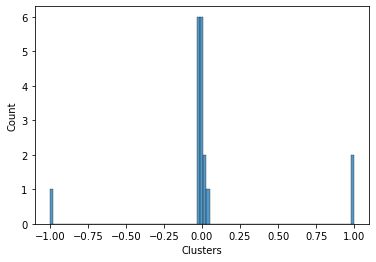

In [40]:
sns.histplot(df_dummies.corr()['Clusters'])

<AxesSubplot:>

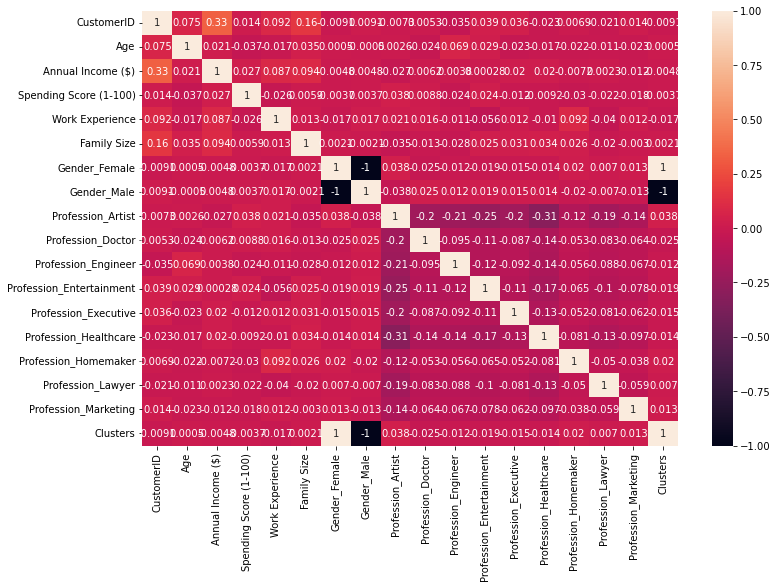

In [41]:
plt.figure(figsize = (12,8))
sns.heatmap(df_dummies.corr(), annot=True)

#### Explore k=2 with removal of Age, annual income, spending score, family size

In [42]:
explore_df = scaled_df[['Work Experience', 'Gender_Female', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing']]

In [43]:
explore_df.head()

,Work Experience,Gender_Female,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,-0.787837,-1.208025,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,2.190082,-0.177471,-0.279094,-0.212633
1,-0.278342,-1.208025,-0.672553,-0.298741,3.158742,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
2,-0.787837,0.827798,-0.672553,-0.298741,3.158742,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
3,-1.042584,0.827798,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,3.583019,-0.212633
4,-0.533089,0.827798,-0.672553,-0.298741,-0.316582,2.719823,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633


In [44]:
explore_df_X = scaler.fit_transform(explore_df)

In [45]:
explore_df_X

array([[-0.78783663, -1.2080249 , -0.67255346, ..., -0.1774713 ,
        -0.27909422, -0.21263294],
       [-0.27834215, -1.2080249 , -0.67255346, ..., -0.1774713 ,
        -0.27909422, -0.21263294],
       [-0.78783663,  0.82779751, -0.67255346, ..., -0.1774713 ,
        -0.27909422, -0.21263294],
       ...,
       [ 1.25014129, -1.2080249 , -0.67255346, ..., -0.1774713 ,
        -0.27909422, -0.21263294],
       [ 0.74064681, -1.2080249 , -0.67255346, ..., -0.1774713 ,
        -0.27909422, -0.21263294],
       [ 0.23115233, -1.2080249 , -0.67255346, ..., -0.1774713 ,
        -0.27909422, -0.21263294]])

In [46]:
cluster_labels1 = model.fit_predict(explore_df_X)
print(model.inertia_)
print(metrics.silhouette_score(explore_df_X, cluster_labels1))

19233.153218605
0.13409168065047808


In [47]:
explore_df['Clusters'] = cluster_labels1

C:\Users\padma\AppData\Local\Temp\ipykernel_17716\838923595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explore_df['Clusters'] = cluster_labels1


In [48]:
explore_df.corr()['Clusters']

Work Experience             0.010430
Gender_Female               0.014142
Profession_Artist           0.307091
Profession_Doctor           0.136406
Profession_Engineer         0.144552
Profession_Entertainment    0.167880
Profession_Executive        0.132680
Profession_Healthcare      -1.000000
Profession_Homemaker        0.081034
Profession_Lawyer           0.127435
Profession_Marketing        0.097089
Clusters                    1.000000
Name: Clusters, dtype: float64

In [49]:
explore_df[explore_df['Gender_Female'] == 0.827798]['Clusters']

Series([], Name: Clusters, dtype: int32)

In [50]:
explore_df.head()

,Work Experience,Gender_Female,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Clusters
0,-0.787837,-1.208025,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,2.190082,-0.177471,-0.279094,-0.212633,0
1,-0.278342,-1.208025,-0.672553,-0.298741,3.158742,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633,1
2,-0.787837,0.827798,-0.672553,-0.298741,3.158742,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633,1
3,-1.042584,0.827798,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,3.583019,-0.212633,1
4,-0.533089,0.827798,-0.672553,-0.298741,-0.316582,2.719823,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633,1


# Choosing K Value

In [51]:
ssd = []

for k in range (2,20):
    model = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    model.fit_predict(scaled_X)
    
    ssd.append(model.inertia_)

In [52]:
ssd

[29467.15346232405,
 27520.75606485516,
 25612.16769805185,
 23967.78717551075,
 21906.040948256177,
 19779.41903333109,
 17713.59449221176,
 16405.127809644906,
 14441.730955489671,
 13753.076973647887,
 13275.468615301459,
 12844.268773562486,
 12510.844694671732,
 12144.11822154182,
 11991.930774921108,
 11626.777540956344,
 11416.260752324784,
 11198.230885596853]

Text(0, 0.5, ' Sum of Squared Distances')

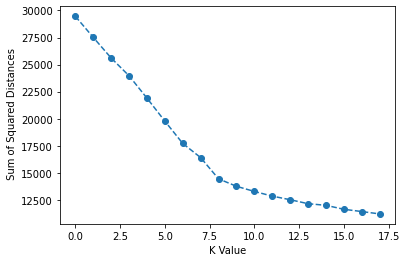

In [53]:

plt.plot(ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
#plt.xlim(2,10)

# The point at which the elbow shape is created is 8, that is, our K value or an optimal number of clusters is 8. Now let’s train the model on the dataset with a number of clusters 8.

In [54]:
new_model = KMeans(n_clusters=8)

In [55]:
y_kmeans = new_model.fit_predict(scaled_X)

In [56]:
y_kmeans

array([4, 1, 1, ..., 4, 5, 2])

In [57]:
new_model.inertia_

18315.84676377528

In [58]:
df_dummies['Clusters'] = y_kmeans

In [59]:
df_dummies

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Clusters
0,1,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,4
1,2,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,1
2,3,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,1
3,4,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,7
4,5,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7,1,0,1,0,0,0,0,0,0,0,0,0
1996,1997,91,73158,32,7,7,1,0,0,1,0,0,0,0,0,0,0,0
1997,1998,87,90961,14,9,2,0,1,0,0,0,0,0,1,0,0,0,4
1998,1999,77,182109,4,7,2,0,1,0,0,0,0,1,0,0,0,0,5


In [60]:
df_dummies['Clusters']

0       4
1       1
2       1
3       7
4       2
       ..
1995    0
1996    0
1997    4
1998    5
1999    2
Name: Clusters, Length: 1965, dtype: int32

In [64]:
df_dummies.columns

Index(['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Work Experience', 'Family Size', 'Gender_Female', 'Gender_Male',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Clusters'],
      dtype='object')

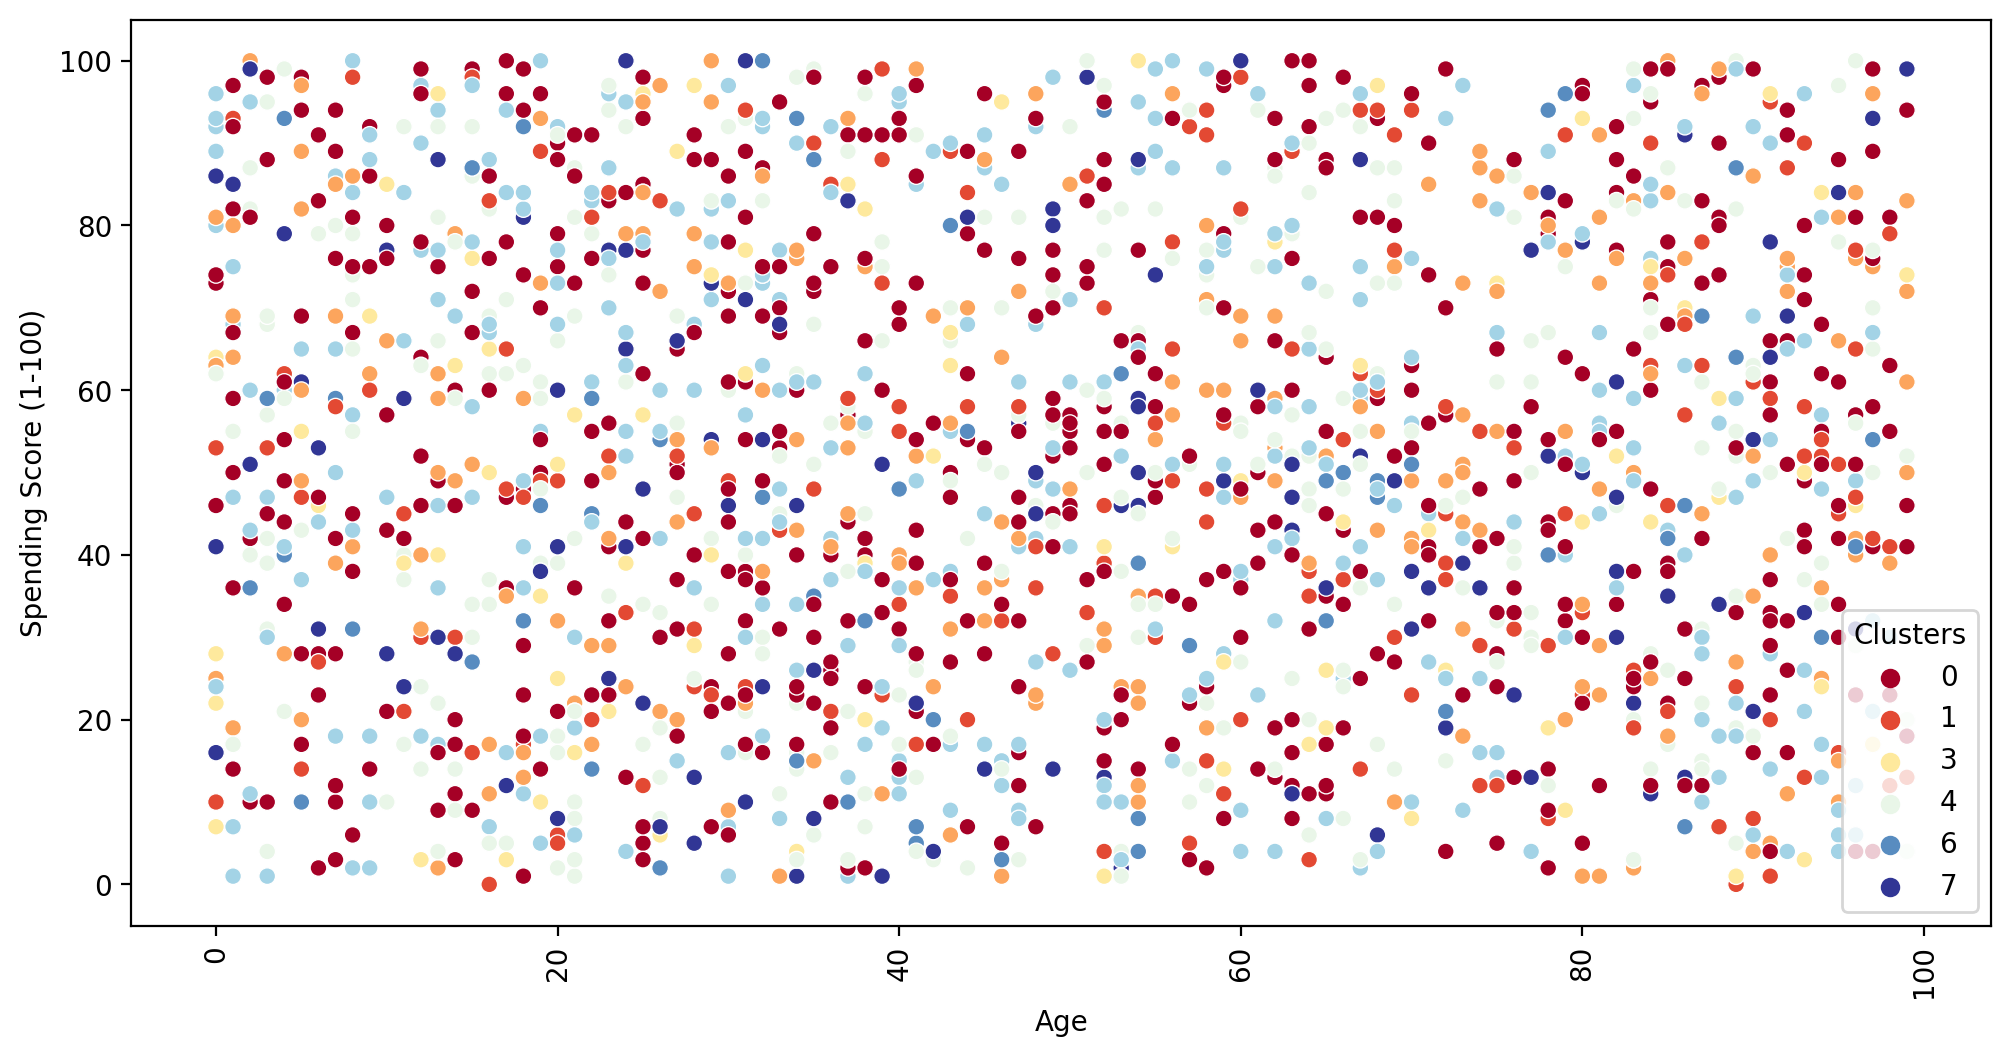

In [65]:
plt.figure(figsize= (12,6),dpi =200)
sns.scatterplot(x="Age", y="Spending Score (1-100)",data=df_dummies,hue="Clusters", palette='RdYlBu')
plt.xticks(rotation = 90);